In [20]:
import geopandas as gpd
import pandas as pd
import os
from shapely.geometry import Point, LineString, Polygon

%matplotlib inline

## Prepare Data

### Read data
Note that, since we are reading a large number of files, data reading will take some time (10-60 secs)

In [21]:
folder_name = 'GeopandasDataset'  #Folder where the csv files are stored. Unzip the folder before use. Folder should be placed in a sub directory beneath the folder which has the .pynb file
wd = os.getcwd() #Get current directory
path =  os.path.join (wd, folder_name) #OS agnostic way of creating path.

trips_df = pd.read_csv(os.path.join(path, "OD_2020_AprMay.csv"), parse_dates=['start_date', 'end_date'])
stations_df = pd.read_csv(os.path.join(path, "stations.csv"))

Convert stations from dataframe to gdf

In [22]:
stations_gdf = gpd.GeoDataFrame(
                stations_df.drop(['longitude', 'latitude'], axis=1),
                crs = {'init' : 'EPSG:4326'},
                geometry = [Point(x,y) for x,y in zip(stations_df.longitude, stations_df.latitude)]
            )

C:\ProgramData\Anaconda3\envs\geom2005\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


### Join dataframes so that lat long is present

In [23]:
trips_df = pd.merge(trips_df, stations_gdf, left_on='start_station_code', right_on='code')
trips_df = pd.merge(trips_df, stations_gdf, left_on='end_station_code', right_on='code')
trips_df

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,code_x,name_x,geometry_x,code_y,name_y,geometry_y
0,2020-04-15 06:00:00,6212.0,2020-04-15 06:20:00,6250.0,1250.0,1.0,6212,Duluth / de l'Esplanade,POINT (-73.58114 45.51509),6250,Marché Jean-Talon (Henri-Julien / Jean-Talon),POINT (-73.61489 45.53679)
1,2020-04-17 07:18:00,6212.0,2020-04-17 07:37:00,6250.0,1182.0,1.0,6212,Duluth / de l'Esplanade,POINT (-73.58114 45.51509),6250,Marché Jean-Talon (Henri-Julien / Jean-Talon),POINT (-73.61489 45.53679)
2,2020-04-22 11:43:00,6212.0,2020-04-22 12:04:00,6250.0,1290.0,1.0,6212,Duluth / de l'Esplanade,POINT (-73.58114 45.51509),6250,Marché Jean-Talon (Henri-Julien / Jean-Talon),POINT (-73.61489 45.53679)
3,2020-04-27 06:46:00,6212.0,2020-04-27 07:02:00,6250.0,951.0,1.0,6212,Duluth / de l'Esplanade,POINT (-73.58114 45.51509),6250,Marché Jean-Talon (Henri-Julien / Jean-Talon),POINT (-73.61489 45.53679)
4,2020-10-05 04:58:00,6212.0,2020-10-05 05:18:00,6250.0,1190.0,1.0,6212,Duluth / de l'Esplanade,POINT (-73.58114 45.51509),6250,Marché Jean-Talon (Henri-Julien / Jean-Talon),POINT (-73.61489 45.53679)
...,...,...,...,...,...,...,...,...,...,...,...,...
444852,2020-04-29 11:29:00,7132.0,2020-04-29 11:49:00,7134.0,1178.0,1.0,7132,Notre-Dame-de-Grâce / Westmount,POINT (-73.61122 45.48047),7134,Sherbrooke / Vignal,POINT (-73.58968 45.48983)
444853,2020-04-28 13:26:00,7094.0,2020-04-28 13:56:00,7134.0,1827.0,1.0,7094,Alfred Laliberté / de Poutrincourt,POINT (-73.69460 45.53308),7134,Sherbrooke / Vignal,POINT (-73.58968 45.48983)
444854,2020-04-25 11:21:00,7128.0,2020-04-25 11:28:00,7134.0,409.0,0.0,7128,Ste-Croix / Tassé,POINT (-73.68516 45.51954),7134,Sherbrooke / Vignal,POINT (-73.58968 45.48983)
444855,2020-02-05 14:17:00,7136.0,2020-02-05 15:22:00,7134.0,3895.0,1.0,7136,Beaudet / Marcel-Laurin,POINT (-73.68176 45.50684),7134,Sherbrooke / Vignal,POINT (-73.58968 45.48983)


### Rename and delete columns 
Also deleting the original dataframes as we do not need them

In [24]:
trips_df = trips_df.rename(columns={
        'geometry_x':'start_geometry',
        'geometry_y': 'end_geometry'})

trips_df = trips_df.drop(['code_x', 'code_y', 'name_x', 'name_y'], axis=1)

del(stations_df)
del(stations_gdf)

trips_df is a dataframe. Need to convert it to a geodataframe

In [25]:
type(trips_df)

pandas.core.frame.DataFrame

In [26]:
trips_gdf = gpd.GeoDataFrame(trips_df, geometry="start_geometry", crs="EPSG:4326")
del(trips_df)

### Here is the dataframe which you will start working with

In [27]:
trips_gdf

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,start_geometry,end_geometry
0,2020-04-15 06:00:00,6212.0,2020-04-15 06:20:00,6250.0,1250.0,1.0,POINT (-73.58114 45.51509),POINT (-73.61489 45.53679)
1,2020-04-17 07:18:00,6212.0,2020-04-17 07:37:00,6250.0,1182.0,1.0,POINT (-73.58114 45.51509),POINT (-73.61489 45.53679)
2,2020-04-22 11:43:00,6212.0,2020-04-22 12:04:00,6250.0,1290.0,1.0,POINT (-73.58114 45.51509),POINT (-73.61489 45.53679)
3,2020-04-27 06:46:00,6212.0,2020-04-27 07:02:00,6250.0,951.0,1.0,POINT (-73.58114 45.51509),POINT (-73.61489 45.53679)
4,2020-10-05 04:58:00,6212.0,2020-10-05 05:18:00,6250.0,1190.0,1.0,POINT (-73.58114 45.51509),POINT (-73.61489 45.53679)
...,...,...,...,...,...,...,...,...
444852,2020-04-29 11:29:00,7132.0,2020-04-29 11:49:00,7134.0,1178.0,1.0,POINT (-73.61122 45.48047),POINT (-73.58968 45.48983)
444853,2020-04-28 13:26:00,7094.0,2020-04-28 13:56:00,7134.0,1827.0,1.0,POINT (-73.69460 45.53308),POINT (-73.58968 45.48983)
444854,2020-04-25 11:21:00,7128.0,2020-04-25 11:28:00,7134.0,409.0,0.0,POINT (-73.68516 45.51954),POINT (-73.58968 45.48983)
444855,2020-02-05 14:17:00,7136.0,2020-02-05 15:22:00,7134.0,3895.0,1.0,POINT (-73.68176 45.50684),POINT (-73.58968 45.48983)


#### Read the montreal geojson file into the a GeoDataFrame named mtl. (1 point)
The rest of the code will do the plotting of the first 500 points

<AxesSubplot:>

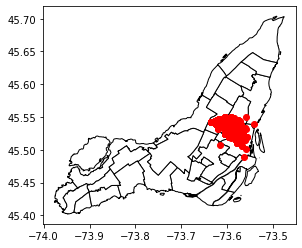

In [28]:
mtl = gpd.read_file(os.path.join(path, "montreal_shapefile.geojson"))
ax = mtl.plot(color='white', edgecolor='black')
# We can now plot our GeoDataFrame.
trips_gdf.head(n=500).plot(ax=ax, color='red')

#### Project the geodataframe and Montreal basemap to UTM Zone 18N (EPSG:32618)
You will need to project the trips_gdf twice. Once by setting `start_geometry` as the geomtry column and once by setting `end_geometry` as the geometry column.<br>
After you are done, remeber to set `start_geometry` as the geometry column

In case of GeoDataFrame, CRS in GeoPandas is stored on the level of GeoDataFrame, not individual GeoSeries. So, it is a bit tricky to project multiple geometry columns. 

In [35]:
trips_gdf = trips_gdf.to_crs("EPSG:32618") #Since start_geometry is set as the geometry, this projects that column and updates the crs asssociated with the GeoSeries
trips_gdf.end_geometry = gpd.GeoSeries(trips_gdf.end_geometry, crs = "EPSG:4326").to_crs("EPSG:32618") #Project the end_geometry column
trips_gdf.crs = "EPSG:32618"  #Without this the crs info of the GeoDataFrame is not updated

C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_7096/2102009827.py:2: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoSeries.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  trips_gdf.end_geometry = gpd.GeoSeries(trips_gdf.end_geometry, crs = "EPSG:4326").to_crs("EPSG:32618") #Project the end_geometry column


#### Project the MTL basemap and set the active geometry of the trips dataframe as the `start_geometry`. (0.5 Point)
The montreal data should be stored in a variable called `mtl`. Project the data to to EPSG 32618
<Br> In the next step, you need to change the start geometry of the `trips_gdf` file to `start_geometry`

In [40]:
#Your code here
mtl = mtl.to_crs("EPSG:32618")
mtl.crs = "EPSG:32618"
trips_gdf = trips_gdf.set_geometry("start_geometry")

Redo the plot

<AxesSubplot:>

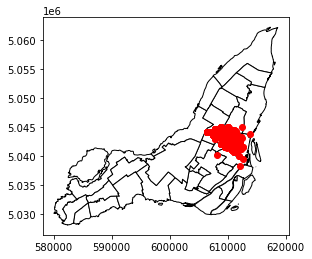

In [41]:
ax = mtl.plot(color='white', edgecolor='black')
# We can now plot our GeoDataFrame
trips_gdf.head(n=500).plot(ax=ax, color='red')

#### Add a column in the the GeoDataFrame that stores the distance between start_geometry and end_geometry. (1 point)
Remember: Your active geometry column is `start_geometry` column. So, when you call the `distance` function on trips_gdf, that column is automatically passed.<br>
Thus far you have specified which column you want to calculate the distance *from*. The distance function requires as a parameter another geometry to calculate the distance *to*. The *to* should be `end_geometry` in this case.<br>
Note that: you will gave to convert the `end_geometry` to a `GeoSeries` before passing it on to the distance function. To do this, extract the `end_gemetry` column and pass it to the `gpd.GeoSeries` function. <br>
The resulting distance should be stored in a new column in the geodataframe (trips_gdf) called `distance`

In [53]:
# Your code here
trips_gdf['distance']=trips_gdf.distance(gpd.GeoSeries(trips_gdf['end_geometry']))

#### What is the average distance of a bixi trip in kms (show only 3 decimal points)? (1 point)

In [ ]:
# Your code here


#### Which day of the week do people travel the most on average? (1 point)
Remember *groupby* and *aggregation*.<br>
You are trying to get the max of the mean distance. <br>
Look at the `idxmax()` function associated with pandas. <br>
`trips_gdf.start_date.dt.day_of_week` gives you day number. Day 0 is Sunday. In the output, you need to convert the number to a day. Try to use a disctionary or list instead of if-else statements for the conversion. Using if-else statements will result is 0.5 less marks.<br>

In [ ]:
#Your code here


#### Spatial Join the start points with the Montreal shapefile. (3 points)
##### The goal is to attach the Montreal Borough name to the points
#### The resulting layer should have POINT geometry(s).
Here is a tutorial for spatial join: https://geopandas.org/gallery/spatial_joins.html
<Br>For this exercise we need a *left* join. You can specify this through the `how` parameter
<Br>After the join remove the column `index_right`, `cartodb_id`, and `type` by using `drop`
<Br>Rename the `district` column as `start_district`
<Br> You can mame the joined file `trips_gdf`

In [ ]:
#Your code here


#### Spatial Join the end points with the Montreal shapefile. (2 points)
#### The resulting layer should have POINT geometry(s).
You need to change the active geometry column to `end_geometry` before the join
<Br>After the join remove the `column index_right`, `cartodb_id`, and `type` by using `drop`
<Br>Again, we are going for a *left* join
<Br>Rename the `district` column as `end_district`
<Br> You can mame the joined file `trips_gdf`
<Br>Reset the active geoemtry as the `start_geoemetry`

In [ ]:
#Your code here


#### In which districts do most and least trips originate? (1 point)
A table with the names of district and number of trips arranged in descending order is acceptable. Alternatively, you can print the names of the districts.
<Br>You need to group the columns by the `end_district` to organize trip data by the destination
<Br>A table with the names of district and number of trips arranged in descending order is acceptable
<Br>Remember that the `size` function returns a more managable output than `count` in these cases.

In [ ]:
#Your code here


#### Make a map to visualize the spatial distribution of where (district) most trips originate? (2.5 Points)
The idea is to create a choropleth map.<br>
Some code and comments are given for you to start. Things inside <> need to be replaced with your code.<br>
You will need to 'merge' the cnts dataframe with the mtl GeoDataFrame to have counts and polygon geometry in the same file. <br>
You are going for a attribute join, or [`merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge). Look at the documentation for [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge) <br>
First create a dataframe called cnts to store most common start points.
* `cnts` is your left dataframe and `mtl` should be passe as a parameter and becomes the right dataframe. 
* You will need to specify the columns on which the join is taking place using the `left_on` and `right_on` parameters.
* Sice you want to preserve all districts in the `mtl` dataframe. Use a `right` join by specifying the `how` parameter.
* Note that many districts no trips data associated with them. Thus, unless you specify a right join, they will be elimintaed from the joined tabled and will produce a map which looks slightly different from the other maps.

The districts which did not have any trips data will have `na` as the number of trips which will need to be converted to 0 before plotting.

In [ ]:
#Your code here
cnts = <replace with answer from previous cell>.to_frame('count').reset_index()
cnts = cnts.merge(<Fill the parameters required to merge cnts with mtl>)
cnts['start_district'] = cnts['start_district'].fillna(0) #Fill missing values/na with 0
cnts['count'] =  #Fill missing values/na for count column with 0
cnts = #Convert cnts into geodataframe. remember to specify geometry column and crs (EPSG:32618)
#Plot the cnts geodataframe. Search how to plot choropleth with geopandas. This should be 1-2 lines of code using the plot() function


#### In which district do most trips end? (1 point)
A table with the names of district and number of trips arranged in descending order is acceptable

In [ ]:
#Your code here


#### What is the most common start AND end district pair? (1 point)
A table with the names of strart and end district and number of trips arranged in descending order is acceptable

In [ ]:
#Your code here


#### On average which pair of start and end district takes the longest time to commute? (1 Point)
A table is acceptable. <br>
Remember that you can group on multiple coulumns

In [ ]:
#Your code here
